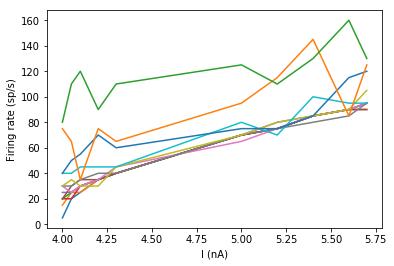

In [64]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex. tools import input_factory, plot_tools

v_rest= -70*b2.mV
v_reset= -65*b2.mV
membrane_resistance = 5 * b2.Mohm
membrane_capacitance = 2*b2.nF
firing_threshold = -50 * b2.mV

simulation_time = 200
dt =  0.1 * b2.ms 

current = [4.00001, 4.05, 4.1, 4.2, 4.3, 5., 5.2, 5.4, 5.6, 5.7]

N = len(current)

eqs = '''
dv/dt =
( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + (current/membrane_capacitance) + (current*sigma*xi*dt**0.5/membrane_capacitance)  : volt 
current : amp
'''
    
plt.figure(1)
#plt.show()
#sigma1 3
sigma = np.arange(0, 4, 0.01)
# for i in range(500)
sigma = [0, 0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9,2,3,5,10]
    
for sigma in sigma:
    neuron = b2.NeuronGroup(N, model=eqs, reset="v=v_reset", threshold="v>firing_threshold",
        refractory=False, method="euler", dt = dt)
    neuron.v = v_rest
    neuron.current = current*b2.nA
    
    state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron)
    b2.run(simulation_time*b2.ms)
    
    plt.plot(neuron.current /b2.nA, spike_monitor.count*1000/simulation_time, label = "Sigma: {}".format(sigma))
    
plt.xlabel('I (nA)')
plt.ylabel('Firing rate (sp/s)')
#plt.legend()
plt.show()

#plot
input_current = [None]*len(current)
# plt.figure(2)
# for i in range(len(current)):
#     input_current[i] = input_factory.get_step_current(
#         t_start=0, t_end=simulation_time, unit_time=b2.ms,
#         amplitude= current[i]*b2.nA) 
#     plot_tools.plot_voltage_and_current_traces(
#     state_monitor, input_current[i], title="min input", firing_threshold=firing_threshold)


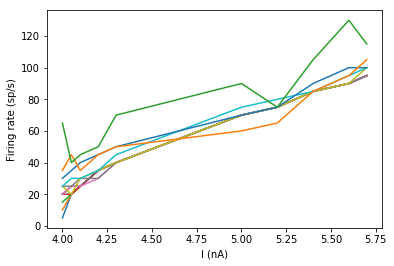

In [63]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex. tools import input_factory, plot_tools

v_rest= -70*b2.mV
v_reset= -65*b2.mV
membrane_resistance = 5 * b2.Mohm
membrane_capacitance = 2*b2.nF
firing_threshold = -50 * b2.mV

simulation_time = 200
dt =  0.01 * b2.ms 

current = [4.00001, 4.05, 4.1, 4.2, 4.3, 5., 5.2, 5.4, 5.6, 5.7]

N = len(current)

eqs = '''
dv/dt =
( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + (current/membrane_capacitance) + (current*sigma*xi*dt**0.5/membrane_capacitance)  : volt 
current : amp
'''
    
plt.figure(1)
#plt.show()
#sigma1 3
sigma = np.arange(0, 4, 0.01)
# for i in range(500)
sigma = [0, 0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9,2,3,5,10]
    
for sigma in sigma:
    neuron = b2.NeuronGroup(N, model=eqs, reset="v=v_reset", threshold="v>firing_threshold",
        refractory=False, method="euler", dt = dt)
    neuron.v = v_rest
    neuron.current = current*b2.nA
    
    state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron)
    b2.run(simulation_time*b2.ms)
    
    plt.plot(neuron.current /b2.nA, spike_monitor.count*1000/simulation_time, label = "Sigma: {}".format(sigma))
    
plt.xlabel('I (nA)')
plt.ylabel('Firing rate (sp/s)')
#plt.legend()
plt.show()

#plot
input_current = [None]*len(current)
# plt.figure(2)
# for i in range(len(current)):
#     input_current[i] = input_factory.get_step_current(
#         t_start=0, t_end=simulation_time, unit_time=b2.ms,
#         amplitude= current[i]*b2.nA) 
#     plot_tools.plot_voltage_and_current_traces(
#     state_monitor, input_current[i], title="min input", firing_threshold=firing_threshold)